In [24]:
pip install imblearn

     |████████████████████████████████| 189 kB 202 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import collections
from joblib import load
from utils import *
from imblearn.over_sampling import SMOTE
import csv

In [2]:
def get_pd(file_name):
    with open(file_name, mode='r') as infile:
        reader = csv.reader(infile)
        rows = []
        for row in reader:
            rows.append(row)
    keys = rows.pop(0)
    bl_rf = {}
    pr_names = [itm[0] for itm in rows]
    keys.pop(0)
    counter = 0
    for row in rows:
        name = pr_names[counter]
        print(row[1], row[2], row[3], row[4], row[5])
        bl_rf[name] = {keys[0]: row[1],
                       keys[1]: row[2],
                       keys[2]: row[3],
                       keys[3]: row[4],
                       keys[4]: row[5]}
        counter += 1
    result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
    return dict(result)

In [3]:
def get_average_mcc(bl_rf):
    sum_def = 0
    for i in bl_rf.values():
        sum_def += float(i['mcc'])
    return sum_def / len(bl_rf)

In [10]:
with open('../scores/baseline_rf.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)

In [11]:
keys = rows.pop(0)

In [12]:
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)

'project'

In [13]:
keys

['mcc', 'c_lower', 'c_upper', 'cost_1000', 'cost_10000']

In [21]:
counter = 0
for row in rows:
    name = pr_names[counter]
#         print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1

{'zeppelin': {'mcc': '0.11418763441534596', 'c_lower': '15.38', 'c_upper': '614.9565217391304', 'cost_1000': '74383', 'cost_10000': '695383'}}
{'zeppelin': {'mcc': '0.11418763441534596', 'c_lower': '15.38', 'c_upper': '614.9565217391304', 'cost_1000': '74383', 'cost_10000': '695383'}, 'httpcomponents-client': {'mcc': '0.0624985960807765', 'c_lower': '6.806372549019608', 'c_upper': '7901.1', 'cost_1000': '32777', 'cost_10000': '302777'}}
{'zeppelin': {'mcc': '0.11418763441534596', 'c_lower': '15.38', 'c_upper': '614.9565217391304', 'cost_1000': '74383', 'cost_10000': '695383'}, 'httpcomponents-client': {'mcc': '0.0624985960807765', 'c_lower': '6.806372549019608', 'c_upper': '7901.1', 'cost_1000': '32777', 'cost_10000': '302777'}, 'ranger': {'mcc': '0.15635075225010964', 'c_lower': '8.46985446985447', 'c_upper': '269.1630434782609', 'cost_1000': '96074', 'cost_10000': '924074'}}
{'zeppelin': {'mcc': '0.11418763441534596', 'c_lower': '15.38', 'c_upper': '614.9565217391304', 'cost_1000': '

In [28]:
bl_rf

{'zeppelin': {'mcc': '0.11418763441534596',
  'c_lower': '15.38',
  'c_upper': '614.9565217391304',
  'cost_1000': '74383',
  'cost_10000': '695383'},
 'httpcomponents-client': {'mcc': '0.0624985960807765',
  'c_lower': '6.806372549019608',
  'c_upper': '7901.1',
  'cost_1000': '32777',
  'cost_10000': '302777'},
 'ranger': {'mcc': '0.15635075225010964',
  'c_lower': '8.46985446985447',
  'c_upper': '269.1630434782609',
  'cost_1000': '96074',
  'cost_10000': '924074'},
 'kylin': {'mcc': '0.020233627186987204',
  'c_lower': '16.969453376205788',
  'c_upper': '738.3863636363636',
  'cost_1000': '54555',
  'cost_10000': '450555'},
 'oozie': {'mcc': '0.10228057703796802',
  'c_lower': '3.919917864476386',
  'c_upper': '492.7',
  'cost_1000': '81909',
  'cost_10000': '801909'},
 'tika': {'mcc': '0.07814407814407814',
  'c_lower': '6.3568181818181815',
  'c_upper': '1288.56',
  'cost_1000': '27797',
  'cost_10000': '252797'},
 'derby': {'mcc': '0.05129884092456805',
  'c_lower': '0.84830339

In [37]:
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))

In [38]:
bl_rf = dict(result)

In [39]:
bl_rf

{'activemq': {'mcc': '0.3351092292711782',
  'c_lower': '1.3639499784389824',
  'c_upper': '334.73770491803276',
  'cost_1000': '64163',
  'cost_10000': '613163'},
 'phoenix': {'mcc': '0.2619807165023672',
  'c_lower': '8.883674488267598',
  'c_upper': '138.7047619047619',
  'cost_1000': '227794',
  'cost_10000': '2117794'},
 'nifi': {'mcc': '0.22198846903273245',
  'c_lower': '10.293121693121693',
  'c_upper': '573.5243902439024',
  'cost_1000': '91727',
  'cost_10000': '829727'},
 'tez': {'mcc': '0.2165607725571732',
  'c_lower': '5.487804878048781',
  'c_upper': '671.9142857142857',
  'cost_1000': '38825',
  'cost_10000': '353825'},
 'httpcomponents-core': {'mcc': '0.20246105974733178',
  'c_lower': '4.080952380952381',
  'c_upper': '18553.0',
  'cost_1000': '4857',
  'cost_10000': '40857'},
 'kafka': {'mcc': '0.18929237556955264',
  'c_lower': '16.35122699386503',
  'c_upper': '533.7613636363636',
  'cost_1000': '98661',
  'cost_10000': '890661'},
 'ranger': {'mcc': '0.156350752250

In [40]:
pd.DataFrame(bl_rf).transpose()

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.3351092292711782,1.3639499784389824,334.73770491803276,64163,613163
phoenix,0.2619807165023672,8.883674488267598,138.7047619047619,227794,2117794
nifi,0.22198846903273245,10.293121693121693,573.5243902439024,91727,829727
tez,0.2165607725571732,5.487804878048781,671.9142857142857,38825,353825
httpcomponents-core,0.20246105974733178,4.080952380952381,18553.0,4857,40857
kafka,0.18929237556955264,16.35122699386503,533.7613636363636,98661,890661
ranger,0.15635075225010964,8.46985446985447,269.1630434782609,96074,924074
flume,0.15422465148515735,32.1423487544484,812.925,49032,409032
falcon,0.14748752532936124,26.48802395209581,193.0974025974026,162847,1548847
pdfbox,0.14563100163104226,0.3897522049559009,152.88235294117646,34928,340928


In [4]:
rf = load("../approaches/baseline_rf_wp/random_forest1.joblib")

In [3]:
pip install sklearn

  Using cached scikit_learn-0.24.2-cp39-cp39-macosx_10_13_x86_64.whl (7.3 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=736c8a1a332839f017ad6a37c24cff8c2d36e997dab430a3b623916222a14663
  Stored in directory: /Users/Sina/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
with open('../scores/bl_rf_n_estimators50.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)

In [36]:
keys = rows.pop(0)

In [37]:
bl_rf1 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)

'project'

In [38]:
keys

['mcc', 'c_lower', 'c_upper', 'cost_1000', 'cost_10000']

In [40]:
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf1[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1

0.08765007706272634 14.922413793103448 600.3098591549295 76193 715193
0.0624985960807765 4.376847290640394 7438.53125 33777 321777
0.15315888960643 7.02092050209205 268.22105263157897 98356 953356
-0.03076973057167496 2.3231511254019295 945.4318181818181 45445 441445
0.07996822384361753 5.873706004140787 458.1904761904762 86837 842837
0.03973341473341473 5.399543378995434 1209.111111111111 29365 272365
0.0188814685217828 0.8957667731629393 1125.4411764705883 36243 342243
0.021190956129949756 12.146153846153846 1587.2903225806451 34158 313158
-0.010647450243042962 8.348837209302326 5211.0 19359 190359
0.0 0.0 2291.4444444444443 9000 90000
0.08700806093779212 10.605714285714285 777.4166666666666 51712 483712
0.21690541669342323 10.162248144220573 561.5833333333334 93583 849583
0.04084877095399994 7.4393063583815024 699.6944444444445 73287 721287
0.08510998549646655 4.574324324324325 740.6666666666666 30677 300677
0.33604825117817533 1.621505376344086 360.2181818181818 58770 553770
-0.001

In [41]:
result = collections.OrderedDict(sorted(bl_rf1.items(), key=lambda t:t[1]["mcc"], reverse=True))

In [42]:
bl_rf1 = dict(result)

In [44]:
pd.DataFrame(bl_rf1).transpose()

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.33604825117817533,1.621505376344086,360.2181818181818,58770,553770
phoenix,0.255560589133008,8.595914299950174,144.02912621359224,223252,2077252
tez,0.24872287940953736,6.48567335243553,671.0294117647059,38527,344527
nifi,0.21690541669342323,10.162248144220573,561.5833333333334,93583,849583
kafka,0.16669474029223424,13.681957186544343,566.0930232558139,94948,868948
directory-fortress-core,0.1658738800943271,35.8021978021978,2980.2727272727275,14258,113258
ranger,0.15315888960643,7.02092050209205,268.22105263157897,98356,953356
pdfbox,0.13470528969240436,0.4069718605627887,151.6764705882353,34969,340969
flume,0.1337476624756691,30.453237410071942,769.3720930232558,51466,438466
pig,0.1295279005720961,7.668231611893583,775.1818181818181,42800,339800


In [34]:
bl_rf1

{}

In [45]:
with open('../scores/bl_rf_n_estimators75.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf2 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf2[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf2.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf2 = dict(result)
pd.DataFrame(bl_rf2).transpose()

0.1422549671266881 14.230113636363637 638.8955223880597 72009 675009
0.022469936327273777 6.738916256157635 7408.5625 34736 322736
0.16037446513494408 8.40956340956341 269.4782608695652 96045 924045
0.0074976541923799855 17.757234726688104 727.25 55045 451045
0.07603103836941734 4.570247933884297 471.2409638554217 85212 832212
0.07285063180826545 5.584090909090909 1302.16 27457 252457
0.016456291007209453 0.777555910543131 1134.1470588235295 35947 341947
0.0568690580546311 11.758620689655173 1643.1666666666667 33069 303069
-0.008688228675398346 2.2325581395348837 5224.8421052631575 19096 190096
0.0 0.0 2291.4444444444443 9000 90000
0.058343889469357105 9.393063583815028 726.5 55250 523250
0.23941950371651252 10.5 564.3855421686746 92912 839912
0.09137682965284818 10.459770114942529 702.0422535211268 72820 711820
0.08510998549646655 6.547297297297297 730.9333333333333 30969 300969
0.30732488783166095 1.3462699439413541 335.40983606557376 64122 613122
0.23433811570504934 3.40476190476190

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.30732488783166095,1.3462699439413541,335.40983606557376,64122,613122
phoenix,0.2685760521028272,8.655395325708602,146.11881188118812,219406,2037406
nifi,0.23941950371651252,10.5,564.3855421686746,92912,839912
httpcomponents-core,0.23433811570504934,3.4047619047619047,18588.5,4715,40715
kafka,0.19563925791935186,15.62691131498471,551.3023255813954,96220,870220
tez,0.19550697117597196,5.5581061692969875,670.5142857142857,38874,353874
pig,0.17053087110307974,8.462558502340094,845.9310344827586,39849,300849
falcon,0.166636748223018,28.74251497005988,188.2077922077922,163600,1549600
flume,0.16317937277754563,32.482142857142854,791.560975609756,50095,419095
ranger,0.16037446513494408,8.40956340956341,269.4782608695652,96045,924045


In [46]:
with open('../scores/bl_rf_n_estimators25.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf3 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf3[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf3.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf3 = dict(result)
pd.DataFrame(bl_rf3).transpose()

0.09251592555191611 20.997167138810198 612.1666666666666 73412 667412
0.056359466065826244 8.24078624078624 7627.612903225807 34354 313354
0.1566248698281216 12.483193277310924 236.03092783505156 102942 975942
-0.036696196724058265 1.8344051446945338 952.3409090909091 45141 441141
0.10363614340262492 6.743326488706366 475.5125 83284 803284
0.0320418337302127 6.609589041095891 1189.4814814814815 29895 272895
0.16005468860149555 1.5802075019952115 1142.125 35960 323960
0.04152804921966266 12.865900383141762 1633.5333333333333 33358 303358
-0.014439084631960022 11.674418604651162 5203.473684210527 19502 190502
-0.005523176235907565 0.24675324675324675 2283.0 9076 90076
0.08700806093779212 12.520114942528735 733.42 54357 504357
0.20059005604884433 11.73044397463002 563.6913580246913 92097 821097
0.02628585139893974 9.855491329479769 693.8888888888889 73705 721705
0.0721891311812856 6.445945945945946 731.4333333333333 30954 300954
0.24858898558570816 1.818025010780509 317.4754098360656 6521

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24858898558570816,1.818025010780509,317.4754098360656,65216,614216
phoenix,0.2307313960923715,8.412437810945274,147.84729064039408,219909,2046909
directory-fortress-core,0.21820822416879584,44.38461538461539,2909.2727272727275,15039,114039
nifi,0.20059005604884433,11.73044397463002,563.6913580246913,92097,821097
tez,0.16316132832648575,7.761836441893831,626.6285714285714,40410,355410
derby,0.16005468860149555,1.5802075019952115,1142.125,35960,323960
kafka,0.15818936951111442,15.48776758409786,552.3604651162791,96129,870129
flume,0.1577374177304902,31.259786476868328,819.125,48784,408784
ranger,0.1566248698281216,12.483193277310924,236.03092783505156,102942,975942
calcite,0.15494857284163704,30.635593220338983,2427.596153846154,62845,530845


In [47]:
with open('../scores/bl_rf_n_estimators200.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf4 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf4[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf4.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf4 = dict(result)
pd.DataFrame(bl_rf4).transpose()

0.1398909148795766 16.251428571428573 610.536231884058 74688 695688
0.0884150569054865 7.69682151589242 8160.758620689655 32148 293148
0.2008590751690091 11.304526748971194 268.3103448275862 92494 875494
0.020233627186987204 17.355305466237944 732.9318181818181 54795 450795
0.1245929302323185 5.207392197125257 484.8625 82536 802536
0.08097686667589177 5.232346241457859 1258.2307692307693 28297 262297
0.05129884092456805 0.9548902195608783 1155.030303030303 35392 332392
0.0350721770499325 9.857692307692307 1606.483870967742 33563 312563
-0.004340090145693533 1.697674418604651 5226.0526315789475 19073 190073
0.0 0.0 2291.4444444444443 9000 90000
0.09973498579426167 12.755747126436782 731.78 54439 504439
0.21128600809256648 10.664194915254237 562.5180722891566 93067 840067
0.08575567291783787 7.568965517241379 709.1267605633802 72317 711317
0.1226210826460416 4.027027027027027 743.3666666666667 30596 300596
0.3642259016239537 1.3938091143594153 376.6666666666667 57242 543242
-0.0010497069

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.3642259016239537,1.3938091143594153,376.6666666666667,57242,543242
phoenix,0.2334989040275959,8.839438033115906,133.20454545454547,237617,2217617
nifi,0.21128600809256648,10.664194915254237,562.5180722891566,93067,840067
tez,0.20140520914725274,5.485632183908046,653.4444444444445,39818,363818
ranger,0.2008590751690091,11.304526748971194,268.3103448275862,92494,875494
flume,0.17023785909539652,35.34163701067616,790.45,49931,409931
kafka,0.16878897097756884,14.890937019969279,538.629213483146,98694,899694
pdfbox,0.15775524081733378,0.3498530029399412,155.6764705882353,34833,340833
falcon,0.14927870975761834,25.846385542168676,192.32692307692307,164581,1568581
zeppelin,0.1398909148795766,16.251428571428573,610.536231884058,74688,695688


In [2]:
# max features: all, 0.9, half, log
with open('../scores/bl_rf_max_features50.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf5 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf5[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf5.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf5 = dict(result)
pd.DataFrame(bl_rf5).transpose()

0.18562746251475346 15.830985915492958 659.296875 69620 645620
0.027154977680568595 4.965601965601966 7670.612903225807 33021 312021
0.16889358047126135 9.257861635220126 254.38541666666666 100416 964416
0.011989548475929595 17.15273311897106 735.7954545454545 54669 450669
0.06517444647298959 3.987603305785124 474.6385542168675 84930 831930
0.08097686667589177 4.665909090909091 1318.32 27053 252053
0.1591648348786489 1.0115676106900677 1224.9032258064517 33536 312536
-0.009050788715095247 6.667953667953668 1582.40625 33727 321727
-0.004340090145693533 0.16279069767441862 5229.526315789473 19007 190007
0.0 0.0 2291.4444444444443 9000 90000
0.13219681311611906 14.453757225433526 692.8269230769231 57001 525001
0.20402001959040508 8.61276595744681 559.3103448275862 95096 878096
0.05986779891026041 6.092485549132948 702.9305555555555 73054 721054
0.09338696897782661 3.816326530612245 720.516129032258 31561 310561
0.32631875365433216 0.9680896938335489 349.78688524590166 63245 612245
0.23433

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.32631875365433216,0.9680896938335489,349.78688524590166,63245,612245
httpcomponents-core,0.23433811570504934,3.3333333333333335,18592.25,4700,40700
tez,0.2153852209715255,6.737822349570201,665.8529411764706,38703,344703
flume,0.21461796193710284,32.91103202846975,807.525,49248,409248
nifi,0.20402001959040508,8.61276595744681,559.3103448275862,95096,878096
phoenix,0.1961116100567075,8.673163418290855,139.46698113207546,229355,2137355
zeppelin,0.18562746251475346,15.830985915492958,659.296875,69620,645620
kafka,0.17933221100486388,16.919330289193304,560.433734939759,94116,841116
ranger,0.16889358047126135,9.257861635220126,254.38541666666666,100416,964416
derby,0.1591648348786489,1.0115676106900677,1224.9032258064517,33536,312536


In [3]:
with open('../scores/bl_rf_max_features75.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf6 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf6[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf6.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf6 = dict(result)
pd.DataFrame(bl_rf6).transpose()

0.13065422699843263 13.744252873563218 606.0845070422536 75783 714783
0.028570040679394948 2.041769041769042 7709.0 31831 310831
0.1806167701519766 11.290794979079498 246.73684210526315 100397 955397
0.014501003207027473 17.713826366559484 727.8636363636364 55018 451018
0.11182562921155056 4.397938144329897 477.9512195121951 84133 822133
0.1200923716920775 5.058956916099773 1365.8333333333333 26231 242231
0.17025340322412022 0.8751993620414673 1277.1 32195 302195
-0.009050788715095247 8.687258687258687 1566.0625 34250 322250
-0.006139709610587908 0.20930232558139536 5229.421052631579 19009 190009
0.0 0.0 2291.4444444444443 9000 90000
0.21175240318673352 13.411931818181818 789.2826086956521 50721 464721
0.17595546280043597 8.522388059701493 547.8876404494382 96994 897994
0.018560816878107372 6.196531791907514 702.6805555555555 73072 721072
0.08492988153423789 3.0 724.3870967741935 31441 310441
0.30936650166032775 1.0206985769728332 347.78688524590166 63367 612367
0.2876853555746527 3.3 

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.30936650166032775,1.0206985769728332,347.78688524590166,63367,612367
httpcomponents-core,0.2876853555746527,3.3,18594.0,4693,40693
phoenix,0.23742485392282972,8.905622489959839,132.0452488687783,238740,2227740
pdfbox,0.22390015270050787,0.4448174569869912,158.3125,33060,321060
nutch,0.21175240318673352,13.411931818181818,789.2826086956521,50721,464721
tez,0.20038586174219244,6.857758620689655,626.9166666666666,40773,364773
ranger,0.1806167701519766,11.290794979079498,246.73684210526315,100397,955397
nifi,0.17595546280043597,8.522388059701493,547.8876404494382,96994,897994
derby,0.17025340322412022,0.8751993620414673,1277.1,32195,302195
kafka,0.1556697218343192,12.538461538461538,549.8,98150,908150


In [4]:
with open('../scores/bl_rf_max_features100.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf7 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf7[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf7.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf7 = dict(result)
pd.DataFrame(bl_rf7).transpose()

0.14408243560912104 9.74785100286533 634.4714285714285 73402 703402
0.05410027835151768 2.284313725490196 7962.6 30932 300932
0.148052177051626 8.976939203354299 255.78125 100282 964282
0.02356127620397969 17.278135048231512 734.0227272727273 54747 450747
0.1245929302323185 5.254620123203286 484.575 82559 802559
0.17337826742559168 4.957013574660634 1426.9565217391305 25191 232191
-0.014899195785690577 0.39392728725529363 1129.2 35986 350986
-0.008183364170533208 8.694980694980694 1566.0 34252 322252
0.0 0.0 5229.894736842105 19000 190000
-0.0039032880412403557 0.08766233766233766 2288.4444444444443 9027 90027
0.15256997894815236 13.724137931034482 725.04 54776 504776
0.23818772340235245 9.4171974522293 563.3529411764706 93871 858871
0.04597970122388329 9.76878612716763 694.0972222222222 73690 721690
0.07761077882436901 2.6530612244897958 726.0322580645161 31390 310390
0.33984260222923224 1.0564655172413793 352.18333333333334 62451 602451
-0.002349228265495234 1.0776699029126213 9355.8

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.33984260222923224,1.0564655172413793,352.18333333333334,62451,602451
nifi,0.23818772340235245,9.4171974522293,563.3529411764706,93871,858871
flume,0.23050765128946882,27.365591397849464,807.4761904761905,49635,427635
phoenix,0.19602736049776723,8.374187093546773,141.0373831775701,230740,2156740
tika,0.17337826742559168,4.957013574660634,1426.9565217391305,25191,232191
nutch,0.15256997894815236,13.724137931034482,725.04,54776,504776
tez,0.148396750475269,3.3309352517985613,676.4054054054054,39315,372315
ranger,0.148052177051626,8.976939203354299,255.78125,100282,964282
pig,0.14416732589527992,8.976544175136826,746.875,43481,331481
zeppelin,0.14408243560912104,9.74785100286533,634.4714285714285,73402,703402


In [7]:
with open('../scores/bl_rf_n_estimators_100.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf8 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf8[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf8.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf8 = dict(result)
pd.DataFrame(bl_rf8).transpose()

0.03164630677905994 6.307017543859649 592.961038961039 79157 772157
-0.00844186165656578 1.8493827160493828 7244.272727272727 33749 330749
0.10984712093990688 7.966244725738397 253.14141414141415 102776 993776
-0.018174361797764688 0.28135048231511256 974.2954545454545 44175 440175
0.021469688008935395 3.768595041322314 475.9156626506024 84824 831824
0.05732383767981917 7.543181818181818 1267.68 28319 253319
0.23600319753021418 0.9784774810681547 1312.1724137931035 31455 292455
0.011876284563914359 10.669230769230769 1599.6774193548388 33774 312774
0.0492814276874176 9.581395348837209 5208.210526315789 19412 190412
-0.0039032880412403557 0.2077922077922078 2284.3333333333335 9064 90064
0.1705900980057702 8.60919540229885 760.64 52996 502996
0.14991004260953192 6.453290870488322 596.2 91079 856079
0.023072260611547348 3.453488372093023 699.6027397260274 73594 730594
0.03906554402134851 1.7891156462585034 730.1290322580645 31263 310263
0.233403209371768 1.0474342388960758 346.77049180327

,mcc,c_lower,c_upper,cost_1000,cost_10000
derby,0.23600319753021418,0.9784774810681547,1312.1724137931035,31455,292455
activemq,0.233403209371768,1.0474342388960758,346.7704918032787,63429,612429
nutch,0.1705900980057702,8.60919540229885,760.64,52996,502996
nifi,0.14991004260953192,6.453290870488322,596.2,91079,856079
knox,0.1310507206860642,18.17829457364341,1892.5185185185185,83345,812345
flume,0.1286559427483809,27.905454545454546,736.4130434782609,53674,467674
ranger,0.10984712093990688,7.966244725738397,253.14141414141415,102776,993776
storm,0.06294132722999847,13.593073593073592,2197.9864864864867,77140,743140
tika,0.05732383767981917,7.543181818181818,1267.68,28319,253319
streams,0.0492814276874176,9.581395348837209,5208.210526315789,19412,190412


In [8]:
with open('../scores/bl_rf_n_estimators_500.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.14962631588693312 14.218390804597702 603.7605633802817 75948 714948
-0.010040457438187093 2.1530864197530866 7240.545454545455 33872 330872
0.13512454678807945 6.957805907172996 257.969696969697 102298 993298
-0.02100795474022395 0.45819935691318325 971.7954545454545 44285 440285
0.07291409280439089 5.9427402862985685 492.55128205128204 80906 782906
0.10688458400479237 7.886363636363637 1261.64 28470 253470
0.22133859850312113 1.1147867676365086 1300.3793103448277 31797 292797
0.01724849921348599 10.992307692307692 1596.967741935484 33858 312858
0.035924695950887986 9.976744186046512 5207.315789473684 19429 190429
-0.005523176235907565 0.2564935064935065 2282.6666666666665 9079 90079
0.1705900980057702 10.180515759312321 764.795918367347 52553 493553
0.13229207338610052 6.528161530286929 588.5232558139535 92143 866143
-0.015036611141757873 3.255813953488372 700.068493150685 73560 730560
0.033196149128836804 2.6802721088435373 725.9032258064516 31394 310394
0.27786364102428374 0.85640

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.27786364102428374,0.8564036222509702,354.0327868852459,62986,611986
derby,0.22133859850312113,1.1147867676365086,1300.3793103448277,31797,292797
flume,0.19094128184043901,31.71785714285714,796.780487804878,49881,418881
nutch,0.1705900980057702,10.180515759312321,764.795918367347,52553,493553
zeppelin,0.14962631588693312,14.218390804597702,603.7605633802817,75948,714948
ranger,0.13512454678807945,6.957805907172996,257.969696969697,102298,993298
nifi,0.13229207338610052,6.528161530286929,588.5232558139535,92143,866143
knox,0.1310507206860642,21.62204724409449,1842.0843373493976,85746,832746
tika,0.10688458400479237,7.886363636363637,1261.64,28470,253470
tez,0.09133142463790711,3.9754689754689756,630.4358974358975,41755,392755


In [9]:
with open('../scores/bl_rf_n_estimators_200.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf81 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf81[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf81.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf81 = dict(result)
pd.DataFrame(bl_rf81).transpose()

0.09963686682508573 9.203488372093023 595.32 78166 753166
0.02148449815173703 2.1748768472906406 7466.46875 32883 320883
0.11988985510087907 7.658227848101266 254.6161616161616 102630 993630
-0.018174361797764688 0.3842443729903537 972.8409090909091 44239 440239
0.038948729655531616 4.675619834710743 470.6265060240964 85263 832263
0.05732383767981917 7.9635535307517085 1212.1153846153845 29496 263496
0.22580476128812388 1.2702271821442805 1286.9310344827586 32187 293187
0.015550430526131656 10.923076923076923 1597.5483870967741 33840 312840
0.035924695950887986 9.976744186046512 5207.315789473684 19429 190429
-0.005523176235907565 0.2922077922077922 2281.4444444444443 9090 90090
0.18044784904181513 8.991379310344827 757.98 53129 503129
0.15360588395075173 6.348565356004251 590.4883720930233 91974 865974
0.036855612267617244 2.191860465116279 702.5753424657535 73377 730377
0.03906554402134851 1.7891156462585034 730.1290322580645 31263 310263
0.24928786734299951 1.056970220112214 335.444

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24928786734299951,1.056970220112214,335.44444444444446,65449,632449
derby,0.22580476128812388,1.2702271821442805,1286.9310344827586,32187,293187
nutch,0.18044784904181513,8.991379310344827,757.98,53129,503129
nifi,0.15360588395075173,6.348565356004251,590.4883720930233,91974,865974
knox,0.14733965496774706,20.25581395348837,1889.20987654321,83613,812613
flume,0.14589805352491952,26.557553956834532,794.5581395348837,50383,437383
ranger,0.11988985510087907,7.658227848101266,254.6161616161616,102630,993630
tez,0.10904428583441521,4.360750360750361,623.5897435897435,42022,393022
zeppelin,0.09963686682508573,9.203488372093023,595.32,78166,753166
storm,0.08815987793132198,10.03896103896104,2209.0810810810813,76319,742319


In [22]:
with open('../scores/bl_rf_n_estimators_50.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf50 = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf50[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf50.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf50 = dict(result)
pd.DataFrame(bl_rf50).transpose()

0.18005400474769262 12.752136752136753 637.3382352941177 72476 684476
-0.010453428262808538 5.375308641975309 7201.0 35177 332177
0.1310877945586262 6.707368421052632 261.7448979591837 101186 983186
-0.01658216705016328 0.4405144694533762 972.0454545454545 44274 440274
0.09372658696510262 6.610655737704918 482.26582278481015 82226 793226
0.10655744213472428 8.2562358276644 1307.0833333333333 27641 243641
0.20960992357948952 1.3911483253588517 1233.9666666666667 33489 303489
0.008800945106267484 12.919230769230769 1580.8064516129032 34359 313359
0.09949696758691157 5.558139534883721 5217.315789473684 19239 190239
0.13782260314653613 0.37216828478964403 2563.5 8115 80115
0.17875753223252638 11.32564841498559 727.4117647058823 54930 513930
0.14988710348618636 6.800424628450106 592.3529411764706 91406 856406
0.036855612267617244 0.5028901734104047 716.3611111111111 72087 720087
0.03906554402134851 1.7891156462585034 730.1290322580645 31263 310263
0.21213558169060048 0.8686257562662058 326.

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.21213558169060048,0.8686257562662058,326.8484848484849,68010,662010
derby,0.20960992357948952,1.3911483253588517,1233.9666666666667,33489,303489
zeppelin,0.18005400474769262,12.752136752136753,637.3382352941177,72476,684476
nutch,0.17875753223252638,11.32564841498559,727.4117647058823,54930,513930
nifi,0.14988710348618636,6.800424628450106,592.3529411764706,91406,856406
knox,0.149602062521932,21.015384615384615,1911.3375,82732,802732
archiva,0.13782260314653613,0.37216828478964403,2563.5,8115,80115
ranger,0.1310877945586262,6.707368421052632,261.7448979591837,101186,983186
flume,0.120894282079433,29.490974729241877,758.6363636363636,52169,448169
tika,0.10655744213472428,8.2562358276644,1307.0833333333333,27641,243641


In [19]:
sum_100 = 0
for i in bl_rf8.values():
    sum_100 += float(i['mcc'])
sum_100 / len(bl_rf8)

0.06999800005461804

In [20]:
sum_200 = 0
for i in bl_rf81.values():
    sum_200 += float(i['mcc'])
sum_200 / len(bl_rf81)

0.08279770673596969

In [21]:
sum_500 = 0
for i in bl_rf.values():
    sum_500 += float(i['mcc'])
sum_500 / len(bl_rf)

0.0854269178000403

In [23]:
sum_50 = 0
for i in bl_rf50.values():
    sum_50 += float(i['mcc'])
sum_50 / len(bl_rf50)

0.09380137884976371

In [2]:
with open('../scores/bl_lr_def.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.1829371233153223 54.615584415584415 787.8823529411765 55027 361027
-0.004373530464241204 470.4190476190476 2346.3333333333335 215576 377576
0.15520640052171603 31.52998065764023 223.85714285714286 72301 576301
0.051849675968550474 24.01386748844376 1615.235294117647 32585 185585
0.19273305696512222 22.911242603550296 495.15 71616 611616
0.053232564035983136 44.682432432432435 722.4761904761905 40839 229839
0.16713840361655263 6.316521048451151 1230.15 35905 215905
0.10089452350314489 62.49077490774908 1771.45 36935 216935
0.07363365873385348 227.42222222222222 5243.176470588235 27234 180234
0.05119066688086633 23.185897435897434 2677.8 12234 57234
0.19067360494079022 82.17493472584856 637.0 46473 181473
0.17294733568763077 37.65334665334665 733.2692307692307 63691 297691
0.07071163191323229 112.79166666666667 566.2075471698113 74656 551656
0.12016988589768203 55.554140127388536 675.0 29722 218722
0.24589735763746753 7.101651842439645 358.6842105263158 35767 206767
0.00563707677465062

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24589735763746753,7.101651842439645,358.6842105263158,35767,206767
knox,0.20423191507897506,82.74691358024691,2963.2083333333335,61405,493405
oozie,0.19273305696512222,22.911242603550296,495.15,71616,611616
nutch,0.19067360494079022,82.17493472584856,637.0,46473,181473
zeppelin,0.1829371233153223,54.615584415584415,787.8823529411765,55027,361027
nifi,0.17294733568763077,37.65334665334665,733.2692307692307,63691,297691
derby,0.16713840361655263,6.316521048451151,1230.15,35905,215905
ranger,0.15520640052171603,31.52998065764023,223.85714285714286,72301,576301
tez,0.1276757456698706,21.68258426966292,595.2,35438,215438
flume,0.12107213411662056,89.66558441558442,1071.6923076923076,40617,157617


In [3]:
sum_def = 0
for i in bl_rf.values():
    sum_def += float(i['mcc'])
sum_def / len(bl_rf)

0.11867752232413563

In [4]:
with open('../scores/bl_lr_penalty_l2.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.13027976502364852 60.236979166666664 705.2571428571429 58131 373131
-0.004373530464241204 470.4190476190476 2346.3333333333335 215576 377576
0.15520640052171603 31.52998065764023 223.85714285714286 72301 576301
0.051849675968550474 24.01386748844376 1615.235294117647 32585 185585
0.19273305696512222 22.911242603550296 495.15 71616 611616
0.053232564035983136 44.682432432432435 722.4761904761905 40839 229839
0.16713840361655263 6.316521048451151 1230.15 35905 215905
0.10089452350314489 62.49077490774908 1771.45 36935 216935
0.07363365873385348 227.42222222222222 5243.176470588235 27234 180234
0.05119066688086633 23.185897435897434 2677.8 12234 57234
0.19067360494079022 82.17493472584856 637.0 46473 181473
0.17294733568763077 37.65334665334665 733.2692307692307 63691 297691
0.07071163191323229 112.79166666666667 566.2075471698113 74656 551656
0.12016988589768203 55.554140127388536 675.0 29722 218722
0.24589735763746753 7.101651842439645 358.6842105263158 35767 206767
0.0056370767746506

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24589735763746753,7.101651842439645,358.6842105263158,35767,206767
knox,0.20423191507897506,82.74691358024691,2963.2083333333335,61405,493405
oozie,0.19273305696512222,22.911242603550296,495.15,71616,611616
nutch,0.19067360494079022,82.17493472584856,637.0,46473,181473
nifi,0.17294733568763077,37.65334665334665,733.2692307692307,63691,297691
derby,0.16713840361655263,6.316521048451151,1230.15,35905,215905
ranger,0.15520640052171603,31.52998065764023,223.85714285714286,72301,576301
zeppelin,0.13027976502364852,60.236979166666664,705.2571428571429,58131,373131
tez,0.1276757456698706,21.68258426966292,595.2,35438,215438
flume,0.12107213411662056,89.66558441558442,1071.6923076923076,40617,157617


In [5]:
sum_def = 0
for i in bl_rf.values():
    sum_def += float(i['mcc'])
sum_def / len(bl_rf)

0.11617002907215115

In [6]:
with open('../scores/bl_lr_penalty_none.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.185345155336266 74.76767676767676 791.6086956521739 52608 259608
-0.004373530464241204 470.4190476190476 2346.3333333333335 215576 377576
0.15520640052171603 31.52998065764023 223.85714285714286 72301 576301
0.051849675968550474 24.01386748844376 1615.235294117647 32585 185585
0.19273305696512222 22.911242603550296 495.15 71616 611616
0.053232564035983136 44.682432432432435 722.4761904761905 40839 229839
0.16713840361655263 6.316521048451151 1230.15 35905 215905
0.10089452350314489 62.49077490774908 1771.45 36935 216935
0.07363365873385348 227.42222222222222 5243.176470588235 27234 180234
0.05119066688086633 23.185897435897434 2677.8 12234 57234
0.19067360494079022 82.17493472584856 637.0 46473 181473
0.17294733568763077 37.65334665334665 733.2692307692307 63691 297691
0.07071163191323229 112.79166666666667 566.2075471698113 74656 551656
0.12016988589768203 55.554140127388536 675.0 29722 218722
0.24589735763746753 7.101651842439645 358.6842105263158 35767 206767
0.00563707677465062 1

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24589735763746753,7.101651842439645,358.6842105263158,35767,206767
knox,0.20423191507897506,82.74691358024691,2963.2083333333335,61405,493405
oozie,0.19273305696512222,22.911242603550296,495.15,71616,611616
nutch,0.19067360494079022,82.17493472584856,637.0,46473,181473
zeppelin,0.185345155336266,74.76767676767676,791.6086956521739,52608,259608
nifi,0.17294733568763077,37.65334665334665,733.2692307692307,63691,297691
derby,0.16713840361655263,6.316521048451151,1230.15,35905,215905
ranger,0.15520640052171603,31.52998065764023,223.85714285714286,72301,576301
tez,0.1276757456698706,21.68258426966292,595.2,35438,215438
flume,0.12107213411662056,89.66558441558442,1071.6923076923076,40617,157617


In [7]:
sum_def = 0
for i in bl_rf.values():
    sum_def += float(i['mcc'])
sum_def / len(bl_rf)

0.11879219051560914

In [8]:
with open('../scores/bl_lr_dual_false.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.13756059414784544 60.696658097686374 806.8 53611 323611
-0.004373530464241204 470.4190476190476 2346.3333333333335 215576 377576
0.15520640052171603 31.52998065764023 223.85714285714286 72301 576301
0.051849675968550474 24.01386748844376 1615.235294117647 32585 185585
0.19273305696512222 22.911242603550296 495.15 71616 611616
0.053232564035983136 44.682432432432435 722.4761904761905 40839 229839
0.16713840361655263 6.316521048451151 1230.15 35905 215905
0.10089452350314489 62.49077490774908 1771.45 36935 216935
0.07363365873385348 227.42222222222222 5243.176470588235 27234 180234
0.05119066688086633 23.185897435897434 2677.8 12234 57234
0.19067360494079022 82.17493472584856 637.0 46473 181473
0.17294733568763077 37.65334665334665 733.2692307692307 63691 297691
0.07071163191323229 112.79166666666667 566.2075471698113 74656 551656
0.12016988589768203 55.554140127388536 675.0 29722 218722
0.24589735763746753 7.101651842439645 358.6842105263158 35767 206767
0.00563707677465062 143.199052

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24589735763746753,7.101651842439645,358.6842105263158,35767,206767
knox,0.20423191507897506,82.74691358024691,2963.2083333333335,61405,493405
oozie,0.19273305696512222,22.911242603550296,495.15,71616,611616
nutch,0.19067360494079022,82.17493472584856,637.0,46473,181473
nifi,0.17294733568763077,37.65334665334665,733.2692307692307,63691,297691
derby,0.16713840361655263,6.316521048451151,1230.15,35905,215905
ranger,0.15520640052171603,31.52998065764023,223.85714285714286,72301,576301
zeppelin,0.13756059414784544,60.696658097686374,806.8,53611,323611
tez,0.1276757456698706,21.68258426966292,595.2,35438,215438
flume,0.12107213411662056,89.66558441558442,1071.6923076923076,40617,157617


In [9]:
sum_def = 0
for i in bl_rf.values():
    sum_def += float(i['mcc'])
sum_def / len(bl_rf)

0.11651673522092244

In [10]:
with open('../scores/bl_lr_c_15.csv', mode='r') as infile:
    reader = csv.reader(infile)
    rows = []
    for row in reader:
        rows.append(row)
keys = rows.pop(0)
bl_rf = {}
pr_names = [itm[0] for itm in rows]
keys.pop(0)
counter = 0
for row in rows:
    name = pr_names[counter]
    print(row[1], row[2], row[3], row[4], row[5])
    bl_rf[name] = {keys[0]: row[1],
                   keys[1]: row[2],
                   keys[2]: row[3],
                   keys[3]: row[4],
                   keys[4]: row[5]}
    counter += 1
result = collections.OrderedDict(sorted(bl_rf.items(), key=lambda t:t[1]["mcc"], reverse=True))
bl_rf = dict(result)
pd.DataFrame(bl_rf).transpose()

0.16388626183338026 60.661417322834644 650.078947368421 61112 403112
-0.013743976186788125 469.57756563245823 2266.157894736842 215753 386753
0.14389616441715447 31.867704280155642 211.135593220339 75380 606380
0.06294090197090049 24.509984639016896 1805.8666666666666 30956 165956
0.2133299861803547 23.580078125 531.8545454545455 67073 562073
0.04187114615001677 45.87837837837838 697.1904761904761 41370 230370
0.18577560736758186 7.236248516026909 2020.1818181818182 29286 128286
0.09478921447612244 59.57454545454546 2248.8125 32383 176383
0.04902900358714808 229.86666666666667 5236.705882352941 27344 180344
0.054072622729641924 31.13738019169329 2719.25 13746 49746
0.17906798665619256 82.81151832460733 587.125 47634 191634
0.17369452822379483 37.612387612387614 734.8461538461538 63650 297650
0.06782127550579684 116.44270833333333 552.9811320754717 75357 552357
0.11624519273822742 56.261146496815286 669.7142857142857 29833 218833
0.24154183622764377 7.1537484116899615 352.2105263157895 

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24154183622764377,7.1537484116899615,352.2105263157895,35890,206890
oozie,0.2133299861803547,23.580078125,531.8545454545455,67073,562073
derby,0.18577560736758186,7.236248516026909,2020.1818181818182,29286,128286
nutch,0.17906798665619256,82.81151832460733,587.125,47634,191634
nifi,0.17369452822379483,37.612387612387614,734.8461538461538,63650,297650
knox,0.16581992950056768,81.71428571428571,2554.5535714285716,68584,572584
zeppelin,0.16388626183338026,60.661417322834644,650.078947368421,61112,403112
ranger,0.14389616441715447,31.867704280155642,211.135593220339,75380,606380
tez,0.1371146237356468,21.837307152875177,619.578947368421,34570,205570
flume,0.12826874345343542,89.49838187702265,1157.8333333333333,39655,147655


In [11]:
sum_def = 0
for i in bl_rf.values():
    sum_def += float(i['mcc'])
sum_def / len(bl_rf)

0.11531887551391662

In [18]:
bl_lr = get_pd('../scores/bl_lr_c_3.csv')
pd.DataFrame(bl_lr).transpose()

0.14714136702442634 51.8031914893617 659.0 62478 449478
-0.022424264677635076 471.7026378896883 2052.8571428571427 217700 406700
0.15532907991427372 32.28957528957529 220.2 71726 566726
0.05279952555157122 23.961479198767336 1617.235294117647 32551 185551
0.20069679274736096 22.1163708086785 501.8666666666667 71213 611213
0.050342968883404525 45.391891891891895 707.4761904761905 41154 230154
0.20318187067475327 6.348394768133175 1632.7333333333333 31017 166017
0.07668231566120008 59.32592592592592 1730.7619047619048 37018 226018
0.058931028901762 191.44444444444446 5338.411764705882 25615 178615
0.03594543611882672 28.556270096463024 1957.0 14881 68881
0.2121979629722486 81.24870466321244 805.5 43362 151362
0.17669179329882298 37.52947052947053 738.0384615384615 63567 297567
0.07304770677233241 111.1340206185567 590.2941176470588 72560 531560
0.13034084951952138 54.77215189873418 712.15 28654 208654
0.25182907598250276 6.826768318509107 392.8421052631579 35118 206118
0.0043345232200745

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.25182907598250276,6.826768318509107,392.8421052631579,35118,206118
nutch,0.2121979629722486,81.24870466321244,805.5,43362,151362
derby,0.20318187067475327,6.348394768133175,1632.7333333333333,31017,166017
oozie,0.20069679274736096,22.1163708086785,501.8666666666667,71213,611213
knox,0.1921731649952151,80.1741935483871,2603.8545454545456,67427,562427
nifi,0.17669179329882298,37.52947052947053,738.0384615384615,63567,297567
ranger,0.15532907991427372,32.28957528957529,220.2,71726,566726
roller,0.15153036673644277,55.18181818181818,6220.0,17105,89105
zeppelin,0.14714136702442634,51.8031914893617,659.0,62478,449478
deltaspike,0.13034084951952138,54.77215189873418,712.15,28654,208654


In [19]:
get_average_mcc(bl_lr)

0.11805156752411892

In [20]:
bl_lr = get_pd('../scores/bl_lr_c_10.csv')
pd.DataFrame(bl_lr).transpose()

0.17502402948221135 54.305263157894736 696.8974358974359 59636 410636
-0.016568576561044532 468.86602870813397 2191.2 215986 395986
0.14289797149527386 32.32432432432432 219.87272727272727 71744 566744
0.05496483356072796 24.59355828220859 1929.2142857142858 30035 156035
0.1912035887044493 21.59009900990099 490.6774193548387 72903 630903
0.03209838779528497 41.67720090293454 752.1818181818181 40463 238463
0.18480958633054592 6.069416898056327 1482.764705882353 32301 185301
0.10063584475834196 60.886861313868614 2098.8823529411766 33683 186683
0.06333265566487761 183.77777777777777 5358.705882352941 25270 178270
0.04694433803716574 25.262820512820515 2548.2 12882 57882
0.19242418552458693 83.1064935064935 694.7692307692307 44996 161996
0.17669179329882298 37.52947052947053 738.0384615384615 63567 297567
0.07155192650202605 112.67179487179487 593.88 71971 521971
0.08672913833573441 51.52597402597402 623.4166666666666 31935 247935
0.22346097005702834 7.434394904458599 242.96 42508 267508


,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.22346097005702834,7.434394904458599,242.96,42508,267508
nutch,0.19242418552458693,83.1064935064935,694.7692307692307,44996,161996
oozie,0.1912035887044493,21.59009900990099,490.6774193548387,72903,630903
knox,0.18999603828600295,83.66451612903226,2594.018181818182,67968,562968
derby,0.18480958633054592,6.069416898056327,1482.764705882353,32301,185301
nifi,0.17669179329882298,37.52947052947053,738.0384615384615,63567,297567
zeppelin,0.17502402948221135,54.305263157894736,696.8974358974359,59636,410636
ranger,0.14289797149527386,32.32432432432432,219.87272727272727,71744,566744
roller,0.13765309027782396,73.27272727272727,5846.875,20090,92090
tez,0.13237952965005328,21.99859747545582,613.5263157894736,34685,205685


In [21]:
get_average_mcc(bl_lr)

0.1165311621776293

In [4]:
bl_lr = get_pd('../scores/bl_lr_c_05.csv')
pd.DataFrame(bl_lr).transpose()

0.1139408172264719 87.90721649484536 442.16129032258067 65108 344108
0.0010001714831577985 475.07380952380953 2237.722222222222 217531 379531
0.13641127500505842 32.26937984496124 213.78947368421052 73651 586651
0.06388169658679048 24.477726574500767 1807.2666666666667 30935 165935
0.202189425950386 22.938976377952756 502.91525423728814 70653 601653
0.044664501412901965 41.68018018018018 785.952380952381 39506 228506
0.20939484339033662 6.02337559429477 1807.5 29203 155203
0.0856261899834706 58.092592592592595 1746.6190476190477 36685 225685
0.057529897574115356 197.4 5322.64705882353 25883 178883
0.04923469471860566 23.262820512820515 2673.0 12258 57258
0.20864165523134495 80.1522309711286 617.0588235294117 47538 200538
0.17444256186605836 37.583416583416586 735.9615384615385 63621 297621
0.07277298091823148 110.51546391752578 592.6470588235294 72440 531440
0.06942636402150151 53.357142857142854 611.6666666666666 32217 248217
0.23166788942495092 7.829309614570097 268.2631578947368 374

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.23166788942495092,7.829309614570097,268.2631578947368,37485,208485
derby,0.20939484339033662,6.02337559429477,1807.5,29203,155203
nutch,0.20864165523134495,80.1522309711286,617.0588235294117,47538,200538
oozie,0.202189425950386,22.938976377952756,502.91525423728814,70653,601653
knox,0.1814534882545896,75.23376623376623,2572.375,67586,571586
nifi,0.17444256186605836,37.583416583416586,735.9615384615385,63621,297621
ranger,0.13641127500505842,32.26937984496124,213.78947368421052,73651,586651
tez,0.13507394332615882,21.863955119214587,618.578947368421,34589,205589
flume,0.12538359397601256,94.45161290322581,1115.3636363636363,40280,139280
roller,0.11396557043473374,90.01807228915662,6274.571428571428,21943,84943


In [5]:
get_average_mcc(bl_lr)

0.11429811171837774

In [6]:
bl_lr = get_pd('../scores/bl_lr_c_01.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.1140181897445038 81.42525773195877 523.2903225806451 62593 341593
0.0021702757799718538 465.0381861575179 2366.2631578947367 213851 384851
0.16035153372187935 31.207436399217222 207.90322580645162 77947 635947
0.048962401819168146 23.773497688751927 1624.4117647058824 32429 185429
0.21136911942918307 22.899408284023668 495.25 71610 611610
0.03770738639639949 42.410835214446955 737.4090909090909 40788 238788
0.15118740705327063 5.480142970611596 1335.45 33799 213799
0.10700244174014331 61.67391304347826 2356.133333333333 32022 167022
0.05684087077654715 191.44444444444446 5338.411764705882 25615 178615
0.06516047780849456 24.690095846645367 3223.75 11728 47728
0.1894053934001898 82.45811518324608 595.5625 47499 191499
0.17578746469435766 36.778 739.925925925926 63778 306778
0.0650627029645105 113.46632124352331 572.4230769230769 73899 541899
0.1084295053760381 53.72435897435897 659.8181818181819 30381 228381
0.2530455893814744 6.5761421319796955 502.25 31546 175546
-0.0015045460742956

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.2530455893814744,6.5761421319796955,502.25,31546,175546
oozie,0.21136911942918307,22.899408284023668,495.25,71610,611610
nutch,0.1894053934001898,82.45811518324608,595.5625,47499,191499
knox,0.18910056626937097,82.0576923076923,2645.1481481481483,66801,552801
nifi,0.17578746469435766,36.778,739.925925925926,63778,306778
ranger,0.16035153372187935,31.207436399217222,207.90322580645162,77947,635947
derby,0.15118740705327063,5.480142970611596,1335.45,33799,213799
tez,0.14778046187582464,22.30586592178771,710.6875,31971,175971
roller,0.11850757383076817,76.96385542168674,6584.142857142857,19776,82776
flume,0.1145945212676825,89.12337662337663,1084.5384615384614,40450,157450


0.11536675543140784

In [7]:
bl_lr = get_pd('../scores/bl_lr_c_001.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.15574372600418432 63.537234042553195 556.3953488372093 66890 453890
0.0062345889338108924 453.8329355608592 2613.3684210526317 209156 380156
0.16312234377286158 32.91923076923077 221.11320754716982 70118 547118
0.05375013415408227 23.93682588597843 1618.1764705882354 32535 185535
0.18775616810334153 21.892857142857142 480.8095238095238 74034 641034
0.03910556139261934 46.08783783783784 692.7619047619048 41463 230463
0.17059791933328217 6.068335319825189 1201.6190476190477 36274 225274
0.08565636815470368 60.90181818181818 2226.0 32748 176748
0.057529897574115356 189.88888888888889 5342.529411764706 25545 178545
0.06360502293455035 27.0 3043.0 12451 48451
0.18350244514783337 82.40575916230367 596.8125 47479 191479
0.17327350934732413 36.68468468468468 718.1428571428571 64648 316648
0.06028569204731451 112.26943005181347 576.8653846153846 73668 541668
0.10038938869770675 57.27741935483871 609.5217391304348 31878 238878
0.23299025410141697 6.877386508273228 320.5217391304348 39210 24621

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.23299025410141697,6.877386508273228,320.5217391304348,39210,246210
oozie,0.18775616810334153,21.892857142857142,480.8095238095238,74034,641034
nutch,0.18350244514783337,82.40575916230367,596.8125,47479,191479
knox,0.1794739620516463,80.61392405063292,2748.1153846153848,64737,532737
nifi,0.17327350934732413,36.68468468468468,718.1428571428571,64648,316648
derby,0.17059791933328217,6.068335319825189,1201.6190476190477,36274,225274
ranger,0.16312234377286158,32.91923076923077,221.11320754716982,70118,547118
zeppelin,0.15574372600418432,63.537234042553195,556.3953488372093,66890,453890
flume,0.12480827889095954,89.64724919093851,1154.0,39701,147701
roller,0.12432651686076315,75.06666666666666,5809.875,20386,92386


0.11310900582185415

In [9]:
bl_lr = get_pd('../scores/bl_lr_c_00001.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.13095158871096893 61.94037940379404 499.18 72856 522856
0.010162153962781379 449.18809523809523 2841.722222222222 206659 368659
0.15714837057984127 32.229729729729726 220.76363636363635 71695 566695
0.06520783078088196 24.28 1703.875 31782 175782
0.214060590603725 23.09861932938856 493.56666666666666 71711 611711
0.03256969535318362 44.93033707865168 750.85 39994 219994
0.20318187067475327 6.274494248314161 1452.3529411764705 32818 185818
0.07241182652142822 60.45255474452555 2105.8823529411766 33564 186564
0.03579530101067467 170.64444444444445 5393.470588235294 24679 177679
0.07166528464862743 23.28115015974441 3334.0 11287 47287
0.21983396743801606 78.77402597402597 823.0769230769231 43328 160328
0.18004680695649716 37.8063872255489 754.96 62882 287882
0.06053918984845981 113.07772020725389 573.8653846153846 73824 541824
0.12386999293455628 55.17088607594937 709.0 28717 208717
0.22007399336808833 8.293395427603725 221.83333333333334 37589 199589
-0.0017300364877193206 163.68246445

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.22007399336808833,8.293395427603725,221.83333333333334,37589,199589
nutch,0.21983396743801606,78.77402597402597,823.0769230769231,43328,160328
oozie,0.214060590603725,23.09861932938856,493.56666666666666,71711,611711
derby,0.20318187067475327,6.274494248314161,1452.3529411764705,32818,185818
nifi,0.18004680695649716,37.8063872255489,754.96,62882,287882
knox,0.16006403375583153,79.39354838709677,2606.0545454545454,67306,562306
ranger,0.15714837057984127,32.229729729729726,220.76363636363635,71695,566695
tez,0.13448215920303266,22.320728291316527,633.6111111111111,33937,195937
zeppelin,0.13095158871096893,61.94037940379404,499.18,72856,522856
deltaspike,0.12386999293455628,55.17088607594937,709.0,28717,208717


0.11275963291115776

In [10]:
bl_lr = get_pd('../scores/bl_lr_c_025.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.13349506217886212 46.04177545691906 838.3611111111111 53634 377634
-0.008300869806023223 471.31666666666666 2325.3888888888887 215953 377953
0.14680433318945774 32.25387596899225 213.9298245614035 73643 586643
0.07183725303068111 25.395419847328245 2400.909090909091 27634 126634
0.2094275250949888 22.562130177514792 498.1 71439 611439
0.0411341175292157 44.39277652370203 697.5 41666 239666
0.2235225415098815 6.6243072050673 1981.25 28733 136733
0.05701702814852567 83.37728937728937 1644.5555555555557 40762 202762
0.057529897574115356 178.26666666666668 5373.294117647059 25022 178022
0.05692238913108199 22.253205128205128 2736.0 11943 56943
0.19899872686362108 81.23498694516971 661.0 46113 181113
0.18004680695649716 37.92215568862275 750.32 62998 287998
0.0652062759970725 112.55440414507773 575.8076923076923 73723 541723
0.08512691011963548 54.4 628.9130434782609 31432 238432
0.2730218252161058 4.566469093988146 710.8888888888889 28786 190786
0.026532822296415206 178.6933962264151 185

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.2730218252161058,4.566469093988146,710.8888888888889,28786,190786
derby,0.2235225415098815,6.6243072050673,1981.25,28733,136733
oozie,0.2094275250949888,22.562130177514792,498.1,71439,611439
nutch,0.19899872686362108,81.23498694516971,661.0,46113,181113
knox,0.18945730748129117,80.87820512820512,2648.5555555555557,66617,552617
nifi,0.18004680695649716,37.92215568862275,750.32,62998,287998
ranger,0.14680433318945774,32.25387596899225,213.9298245614035,73643,586643
tez,0.13575224445295453,21.97054698457223,614.578947368421,34665,205665
zeppelin,0.13349506217886212,46.04177545691906,838.3611111111111,53634,377634
storm,0.1324737159569042,236.87084870848707,2988.205882352941,98192,404192


0.11861656970978794

In [11]:
bl_lr = get_pd('../scores/bl_lr_final.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.11680146038027714 61.74545454545454 707.1470588235294 57772 363772
0.006029233840133794 469.4916864608076 2479.6470588235293 214656 367656
0.15336321847596363 31.88201160541586 220.60714285714286 72483 576483
0.05422573841583432 23.922958397534668 1618.7058823529412 32526 185526
0.18369563608566009 21.705765407554672 475.109375 74918 650918
0.019065647773988358 46.07223476297968 663.6818181818181 42410 240410
0.21179165894528185 6.082474226804123 1573.0 31340 175340
0.05882420499787438 101.94525547445255 1437.1176470588234 44933 197933
0.05225782349782242 185.73333333333332 5353.529411764706 25358 178358
0.07082558954828702 23.277955271565496 3334.25 11286 47286
0.1942558742083697 82.6485788113695 822.0909090909091 42985 141985
0.17669179329882298 37.52947052947053 738.0384615384615 63567 297567
0.06521284421358023 114.91752577319588 575.9019607843137 73294 532294
0.09383776905383824 52.68387096774194 640.4782608695652 31166 238166
0.24884497801786973 7.096145700974163 359.3684210526

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.24884497801786973,7.096145700974163,359.36842105263156,35754,206754
derby,0.21179165894528185,6.082474226804123,1573.0,31340,175340
nutch,0.1942558742083697,82.6485788113695,822.0909090909091,42985,141985
knox,0.1888171850186288,80.23870967741935,2603.672727272727,67437,562437
oozie,0.18369563608566009,21.705765407554672,475.109375,74918,650918
nifi,0.17669179329882298,37.52947052947053,738.0384615384615,63567,297567
ranger,0.15336321847596363,31.88201160541586,220.60714285714286,72483,576483
tez,0.12971424855003716,22.007012622720897,613.2105263157895,34691,205691
roller,0.12362357311867966,79.97590361445783,6512.714285714285,20276,83276
flume,0.12136764136737659,90.8220064724919,1123.75,40064,148064


0.11316926179776056

In [12]:
bl_lr = get_pd('../scores/bl_lr_c_025_2.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.1318516493707754 58.59090909090909 575.6 66913 471913
-0.008300869806023223 471.31666666666666 2325.3888888888887 215953 377953
0.14680433318945774 32.25387596899225 213.9298245614035 73643 586643
0.07183725303068111 25.395419847328245 2400.909090909091 27634 126634
0.2094275250949888 22.562130177514792 498.1 71439 611439
0.0411341175292157 44.39277652370203 697.5 41666 239666
0.2235225415098815 6.6243072050673 1981.25 28733 136733
0.05701702814852567 83.37728937728937 1644.5555555555557 40762 202762
0.057529897574115356 178.26666666666668 5373.294117647059 25022 178022
0.05692238913108199 22.253205128205128 2736.0 11943 56943
0.19899872686362108 81.23498694516971 661.0 46113 181113
0.18004680695649716 37.92215568862275 750.32 62998 287998
0.0652062759970725 112.55440414507773 575.8076923076923 73723 541723
0.08512691011963548 54.4 628.9130434782609 31432 238432
0.2730218252161058 4.566469093988146 710.8888888888889 28786 190786
0.026532822296415206 178.6933962264151 18593.0 39883 57

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.2730218252161058,4.566469093988146,710.8888888888889,28786,190786
derby,0.2235225415098815,6.6243072050673,1981.25,28733,136733
oozie,0.2094275250949888,22.562130177514792,498.1,71439,611439
nutch,0.19899872686362108,81.23498694516971,661.0,46113,181113
knox,0.18945730748129117,80.87820512820512,2648.5555555555557,66617,552617
nifi,0.18004680695649716,37.92215568862275,750.32,62998,287998
ranger,0.14680433318945774,32.25387596899225,213.9298245614035,73643,586643
tez,0.13575224445295453,21.97054698457223,614.578947368421,34665,205665
storm,0.1324737159569042,236.87084870848707,2988.205882352941,98192,404192
zeppelin,0.1318516493707754,58.59090909090909,575.6,66913,471913


0.1185383119570219

In [4]:
bl_lr = get_pd('../scores/svm_default.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.13579047259529128 61.76847290640394 1749.0 38078 155078
0.09564523818625825 43.378896882494004 10558.142857142857 39089 228089
0.19519601317485163 39.518181818181816 308.7826086956522 44735 251735
0.04588282043942336 63.93993993993994 inf 42584 42584
0.023001782724579048 62.75905797101449 445.46666666666664 49643 184643
0.10950411851062077 31.61978021978022 2062.4 24387 114387
0.14301636609489116 11.51501976284585 1421.875 37133 109133
0.09670671141436017 85.25874125874125 5596.0 29384 74384
0.07631013077814615 658.25 6513.9 44229 134229
0.11508818510023297 44.177215189873415 6663.0 14960 23960
0.19221058880278807 95.21518987341773 1139.3333333333333 40610 67610
0.15626782038912998 23.617525773195876 593.8070175438596 79909 592909
0.037295951557993055 129.7560975609756 626.625 66600 426600
0.07312752048901328 75.97560975609755 745.5 26460 152460
0.014617462511492985 9.857563025210084 inf 23461 23461
-0.002268801793031448 137.2654028436019 15368.666666666666 31963 58963
0.059142552867

,mcc,c_lower,c_upper,cost_1000,cost_10000
knox,0.2467320429604634,71.4047619047619,3420.0714285714284,53996,431996
ranger,0.19519601317485163,39.518181818181816,308.7826086956522,44735,251735
nutch,0.19221058880278807,95.21518987341773,1139.3333333333333,40610,67610
nifi,0.15626782038912998,23.617525773195876,593.8070175438596,79909,592909
derby,0.14301636609489116,11.51501976284585,1421.875,37133,109133
zeppelin,0.13579047259529128,61.76847290640394,1749.0,38078,155078
flume,0.129089540643755,91.3343949044586,1838.5714285714287,35679,98679
tez,0.12895372509483086,25.64493758668516,804.7272727272727,29490,128490
archiva,0.11508818510023297,44.177215189873415,6663.0,14960,23960
tika,0.10950411851062077,31.61978021978022,2062.4,24387,114387


0.09967591361410982

In [6]:
bl_lr = get_pd('../scores/svm_gama_auto.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.09244580496748359 13.971751412429379 659.5230769230769 69946 654946
0.07015357206249725 16.09268292682927 8329.0 34598 286598
0.11624355623881126 18.550403225806452 255.01298701298703 86201 779201
0.017280409063392812 3.511146496815287 1074.7105263157894 40205 382205
0.10194394624011517 15.245967741935484 475.53521126760563 78562 717562
0.07243346807955224 11.788288288288289 1417.952380952381 26234 215234
0.10632658244557078 1.5737051792828685 1305.642857142857 31950 283950
0.0758712564848618 26.397769516728623 2057.409090909091 29101 227101
0.03488227151355819 41.25 5419.611111111111 19815 181815
0.1432415076578986 1.935483870967742 2860.4285714285716 7600 70600
0.02415750252688029 24.131805157593124 665.4285714285714 57422 498422
0.057934396477973556 23.903866248693834 484.0 92876 722876
-0.010897686008645872 14.965116279069768 672.4794520547945 75574 732574
0.024934037515634888 28.873333333333335 663.0714285714286 32331 284331
0.20450543884624478 2.051931330472103 376.02 54781 504

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.20450543884624478,2.051931330472103,376.02,54781,504781
archiva,0.1432415076578986,1.935483870967742,2860.4285714285716,7600,70600
knox,0.14301310410546333,26.24264705882353,2055.0,77569,743569
ranger,0.11624355623881126,18.550403225806452,255.01298701298703,86201,779201
derby,0.10632658244557078,1.5737051792828685,1305.642857142857,31950,283950
oozie,0.10194394624011517,15.245967741935484,475.53521126760563,78562,717562
zeppelin,0.09244580496748359,13.971751412429379,659.5230769230769,69946,654946
storm,0.08635749097050308,47.50420168067227,2305.7462686567164,78306,681306
flume,0.0856102943016365,40.54736842105263,833.1388888888889,47556,371556
mahout,0.0758712564848618,26.397769516728623,2057.409090909091,29101,227101


0.07171292086879141

In [7]:
bl_lr = get_pd('../scores/svm_c_2.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.05010341843723271 9.508620689655173 626.8450704225352 74309 713309
0.03527596646229107 10.497549019607844 7850.9 34283 304283
0.06363265600334554 14.45679012345679 250.70114942528735 94026 877026
0.02852361972547597 2.2213375796178343 1096.0263157894738 39395 381395
0.020509191470567536 9.08641975308642 455.6666666666667 85416 814416
0.06122652986422042 8.17233560090703 1308.625 27604 243604
0.17775585139452138 1.1239043824701196 1345.9642857142858 30821 282821
0.08291829066971704 20.776119402985074 2034.608695652174 28568 235568
0.06898392412648188 19.181818181818183 5473.555555555556 18844 180844
0.06044122099861412 0.6699029126213593 2552.0 8207 80207
0.04951138477854119 16.873925501432666 717.1224489795918 54889 495889
0.06083352446249911 19.54699049630412 478.0625 98511 818511
-0.01290286527647748 14.180232558139535 674.3287671232877 75439 732439
0.032596103422155194 21.61744966442953 678.4827586206897 32221 293221
0.2328680943209132 1.2377472055030094 383.3888888888889 56879 54

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.2328680943209132,1.2377472055030094,383.3888888888889,56879,542879
derby,0.17775585139452138,1.1239043824701196,1345.9642857142858,30821,282821
knox,0.1335680086900065,24.328244274809162,1929.7721518987341,82187,793187
flume,0.09605095977198701,35.98233215547703,825.421052631579,48183,390183
mahout,0.08291829066971704,20.776119402985074,2034.608695652174,28568,235568
streams,0.06898392412648188,19.181818181818183,5473.555555555556,18844,180844
ranger,0.06363265600334554,14.45679012345679,250.70114942528735,94026,877026
tika,0.06122652986422042,8.17233560090703,1308.625,27604,243604
nifi,0.06083352446249911,19.54699049630412,478.0625,98511,818511
archiva,0.06044122099861412,0.6699029126213593,2552.0,8207,80207


0.0639181199998914

In [8]:
bl_lr = get_pd('../scores/svm_c_025.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.04698262560151262 19.604456824512535 679.6166666666667 67038 607038
0.07488504676694462 20.383495145631066 8900.461538461539 34398 268398
0.1315493323118274 21.400394477317555 272.530303030303 76850 670850
0.08323123023619246 8.4937106918239 1254.7333333333333 35402 305402
0.06237682405020003 20.22465208747515 486.75 74173 650173
0.018911143866594364 19.659192825112108 1381.2105263157894 27768 198768
0.09821368402327213 1.8768924302788845 1278.4642857142858 32711 284711
0.03480759514722566 37.94795539033457 1916.1818181818182 32208 230208
0.06409732982678695 71.22727272727273 5346.333333333333 21134 183134
0.12410081596554746 3.627009646302251 3249.1666666666665 7128 61128
0.0588911117759094 34.3954802259887 655.7272727272727 56176 452176
0.14500185830900414 27.259526261585993 540.8392857142857 82469 586469
0.01713738480741079 24.075581395348838 651.013698630137 77141 734141
-0.014013611810093089 41.3 596.5 34195 286195
0.21028149635013174 2.295124037639008 433.7142857142857 47366 42

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.21028149635013174,2.295124037639008,433.7142857142857,47366,425366
nifi,0.14500185830900414,27.259526261585993,540.8392857142857,82469,586469
ranger,0.1315493323118274,21.400394477317555,272.530303030303,76850,670850
storm,0.12875875927219568,76.64634146341463,2490.4406779661017,77855,608855
archiva,0.12410081596554746,3.627009646302251,3249.1666666666665,7128,61128
knox,0.12019313824876812,29.95,2163.5142857142855,74193,704193
derby,0.09821368402327213,1.8768924302788845,1278.4642857142858,32711,284711
flume,0.09050236022404884,49.420138888888886,827.7575757575758,47233,344233
tez,0.08842737680362017,13.093883357041252,625.4137931034483,38205,299205
kylin,0.08323123023619246,8.4937106918239,1254.7333333333333,35402,305402


0.07635044631993673

In [9]:
bl_lr = get_pd('../scores/svm_c_3.csv')
display(pd.DataFrame(bl_lr).transpose())
get_average_mcc(bl_lr)

0.04202907104279702 4.903225806451613 591.5769230769231 79672 781672
0.03996178207508194 9.352941176470589 7866.466666666666 33816 303816
0.08501183143131712 13.209876543209877 257.6666666666667 93420 876420
0.04128040403283001 2.195859872611465 1096.4473684210527 39379 381379
0.03355293375233833 7.94238683127572 462.5308641975309 84860 813860
0.08045012325194517 7.083900226757369 1328.625 27124 243124
0.20980346515390016 1.1247011952191235 1345.892857142857 30823 282823
0.07355128621807851 18.381132075471697 1826.6538461538462 30871 264871
0.04435356676584783 16.906976744186046 5191.631578947368 19727 190727
0.07515421820305397 0.44336569579288027 2560.75 8137 80137
0.047391247424572736 13.70487106017192 739.6938775510204 53783 494783
0.050200130028349346 17.704449152542374 482.4457831325301 99713 846713
-0.01207349141249468 12.75 677.6986301369863 75193 732193
0.010061054632887345 17.2027027027027 678.3666666666667 32546 302546
0.2337204053022208 1.2291487532244196 383.75925925925924

,mcc,c_lower,c_upper,cost_1000,cost_10000
activemq,0.2337204053022208,1.2291487532244196,383.75925925925924,56859,542859
derby,0.20980346515390016,1.1247011952191235,1345.892857142857,30823,282823
knox,0.14029598143447142,22.130769230769232,1909.525,82877,802877
flume,0.09658445718088822,31.400709219858157,838.3076923076923,47855,398855
ranger,0.08501183143131712,13.209876543209877,257.6666666666667,93420,876420
httpcomponents-core,0.084774074218635,5.12621359223301,9251.625,9056,81056
tika,0.08045012325194517,7.083900226757369,1328.625,27124,243124
archiva,0.07515421820305397,0.44336569579288027,2560.75,8137,80137
mahout,0.07355128621807851,18.381132075471697,1826.6538461538462,30871,264871
nifi,0.050200130028349346,17.704449152542374,482.4457831325301,99713,846713


0.06893761467605862

In [61]:
rf = load("../approaches/baseline_rf_wp/random_forest_n_estimators_50.joblib")

In [62]:
data = load_project(path="../data", project_name="activemq")
train_df, test_df = prepare_within_project_data(data, drop_months_end=3, num_test_commits=250)

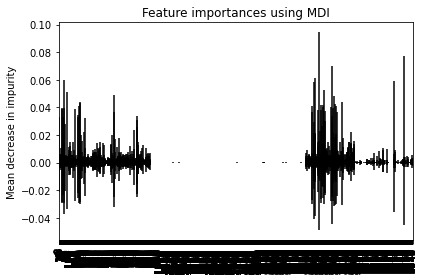

In [21]:
feature_names = []
for col in train_df.columns:
    feature_names.append(col)

In [22]:
feature_names

['commit',
 'committer_date',
 'file',
 'oldest_name',
 'change_type',
 'comm',
 'adev',
 'ddev',
 'add',
 'del',
 'own',
 'minor',
 'sctr',
 'nd',
 'entropy',
 'la',
 'ld',
 'cexp',
 'rexp',
 'sexp',
 'nuc',
 'age',
 'oexp',
 'exp',
 'nsctr',
 'ncomm',
 'nadev',
 'nddev',
 'lt',
 'sm_current_WD',
 'sm_parent_WD',
 'sm_system_WD',
 'sm_parent_system_WD',
 'parent_PDA_class_sum',
 'current_PDA_class_sum',
 'delta_PDA_class_sum',
 'parent_PDA_class_median',
 'current_PDA_class_median',
 'delta_PDA_class_median',
 'parent_PDA_class_max',
 'current_PDA_class_max',
 'delta_PDA_class_max',
 'parent_PDA_class_min',
 'current_PDA_class_min',
 'delta_PDA_class_min',
 'parent_PDA_class_avg',
 'current_PDA_class_avg',
 'delta_PDA_class_avg',
 'parent_LOC_class_sum',
 'current_LOC_class_sum',
 'delta_LOC_class_sum',
 'parent_LOC_class_median',
 'current_LOC_class_median',
 'delta_LOC_class_median',
 'parent_LOC_class_max',
 'current_LOC_class_max',
 'delta_LOC_class_max',
 'parent_LOC_class_min',


In [63]:
X_train = train_df[ALL_FEATURES].values
y_train = train_df['is_inducing']
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

current_CD_method_min         0.022634
current_PMD_ACGE              0.015976
current_NOS_method_median     0.012847
current_PMD_PL                0.011714
current_NLE_method_max        0.011659
current_DLOC_method_median    0.011377
current_NLE_class_median      0.011192
current_TCD_method_median     0.011035
current_CBO_class_avg         0.009050
current_NL_method_median      0.008507
dtype: float64


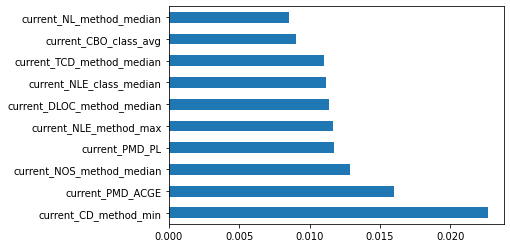

In [64]:
feat_importances = pd.Series(rf.feature_importances_, index=train_df[ALL_FEATURES].columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10))

current_CD_method_min         0.022634
current_PMD_ACGE              0.015976
current_NOS_method_median     0.012847
current_PMD_PL                0.011714
current_NLE_method_max        0.011659
current_DLOC_method_median    0.011377
current_NLE_class_median      0.011192
current_TCD_method_median     0.011035
current_CBO_class_avg         0.009050
current_NL_method_median      0.008507
current_NOS_class_max         0.008393
current_NOI_method_min        0.008391
current_TLLOC_method_max      0.008167
delta_DLOC_method_sum         0.008067
current_PDA_class_min         0.007893
current_HPV_method_max        0.006901
current_TCLOC_method_min      0.006754
current_PDA_class_max         0.006711
current_CLOC_method_median    0.006380
current_PDA_file              0.006065
current_NOS_method_max        0.006059
current_TNOS_method_sum       0.006013
delta_NOS_class_min           0.005943
current_DLOC_class_median     0.005729
current_CLOC_method_min       0.005728
dtype: float64


<AxesSubplot:>

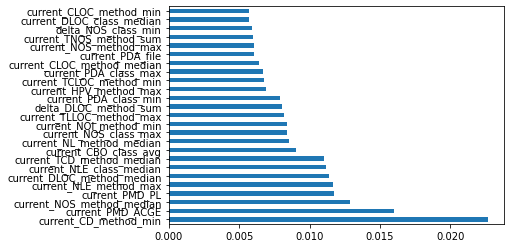

In [65]:
print(feat_importances.nlargest(25))
feat_importances = pd.Series(rf.feature_importances_, index=train_df[ALL_FEATURES].columns)
feat_importances.nlargest(25).plot(kind='barh')

current_CD_method_min         0.022634
current_PMD_ACGE              0.015976
current_NOS_method_median     0.012847
current_PMD_PL                0.011714
current_NLE_method_max        0.011659
current_DLOC_method_median    0.011377
current_NLE_class_median      0.011192
current_TCD_method_median     0.011035
current_CBO_class_avg         0.009050
current_NL_method_median      0.008507
current_NOS_class_max         0.008393
current_NOI_method_min        0.008391
current_TLLOC_method_max      0.008167
delta_DLOC_method_sum         0.008067
current_PDA_class_min         0.007893
current_HPV_method_max        0.006901
current_TCLOC_method_min      0.006754
current_PDA_class_max         0.006711
current_CLOC_method_median    0.006380
current_PDA_file              0.006065
current_NOS_method_max        0.006059
current_TNOS_method_sum       0.006013
delta_NOS_class_min           0.005943
current_DLOC_class_median     0.005729
current_CLOC_method_min       0.005728
current_TLLOC_method_avg 

<AxesSubplot:>

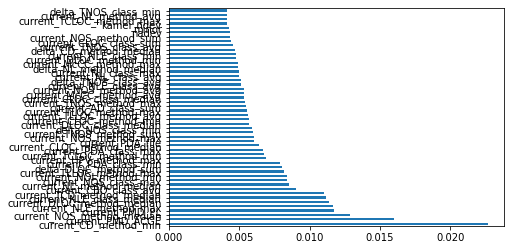

In [66]:
print(feat_importances.nlargest(50))
feat_importances = pd.Series(rf.feature_importances_, index=train_df[ALL_FEATURES].columns)
feat_importances.nlargest(50).plot(kind='barh')

<AxesSubplot:>

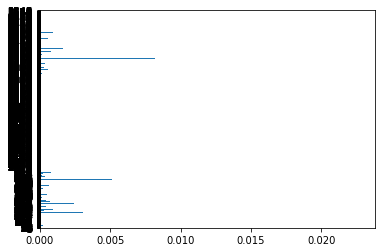

In [37]:
feat_importances.plot(kind='barh')

In [40]:
data[ALL_FEATURES]

,current_McCC_file,parent_McCC_file,delta_McCC_file,current_PDA_file,parent_PDA_file,delta_PDA_file,current_PUA_file,parent_PUA_file,delta_PUA_file,current_LOC_file,...,delta_PMD_UnI,current_PMD_ULV,parent_PMD_ULV,delta_PMD_ULV,current_PMD_UPF,parent_PMD_UPF,delta_PMD_UPF,current_PMD_UPM,parent_PMD_UPM,delta_PMD_UPM
0,1.0,0.0,1.0,22.0,0.0,22.0,0.0,0.0,0.0,235.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,5.0,10.0,0.0,10.0,0.0,0.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,29.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,6.0,0.0,6.0,0.0,0.0,0.0,65.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29839,1.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,24.0,...,0,0,0,0,0,0,0,0,0,0
29840,27.0,27.0,0.0,1.0,1.0,0.0,9.0,9.0,0.0,269.0,...,0,0,0,0,0,0,0,0,0,0
29841,10.0,10.0,0.0,38.0,38.0,0.0,38.0,36.0,2.0,571.0,...,0,0,0,0,0,0,0,0,0,0
29842,3.0,3.0,0.0,2.0,2.0,0.0,3.0,2.0,1.0,92.0,...,2,0,0,0,0,0,0,0,0,0


In [41]:
len(feat_importances)

3549

In [42]:
rf2 = load("../approaches/baseline_rf_wp/random_forest_n_estimators_50.joblib")
data = load_project(path="../data", project_name="zeppelin")
train_df, test_df = prepare_within_project_data(data, drop_months_end=3, num_test_commits=250)

X_train = train_df[ALL_FEATURES].values
y_train = train_df['is_inducing']
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

2610    0.022634
3465    0.015976
2739    0.012847
3366    0.011714
2568    0.011659
2649    0.011377
54      0.011192
2664    0.011035
81      0.009050
2559    0.008507
dtype: float64


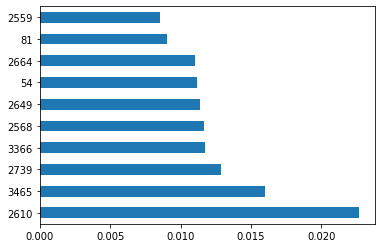

In [43]:
feat_importances = pd.Series(rf2.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10))

2610    0.022634
3465    0.015976
2739    0.012847
3366    0.011714
2568    0.011659
2649    0.011377
54      0.011192
2664    0.011035
81      0.009050
2559    0.008507
558     0.008393
2595    0.008391
2763    0.008167
2654    0.008067
210     0.007893
2838    0.006901
2670    0.006754
213     0.006711
2634    0.006380
3       0.006065
2733    0.006059
2787    0.006013
557     0.005943
204     0.005729
2625    0.005728
dtype: float64


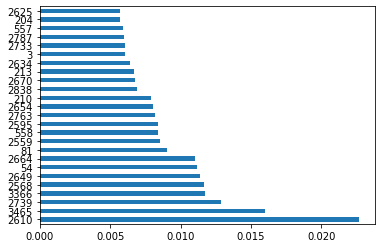

In [44]:
feat_importances = pd.Series(rf2.feature_importances_)
feat_importances.nlargest(25).plot(kind='barh')
print(feat_importances.nlargest(25))

2610    0.022634
3465    0.015976
2739    0.012847
3366    0.011714
2568    0.011659
2649    0.011377
54      0.011192
2664    0.011035
81      0.009050
2559    0.008507
558     0.008393
2595    0.008391
2763    0.008167
2654    0.008067
210     0.007893
2838    0.006901
2670    0.006754
213     0.006711
2634    0.006380
3       0.006065
2733    0.006059
2787    0.006013
557     0.005943
204     0.005729
2625    0.005728
2766    0.005638
2748    0.005583
162     0.005467
2778    0.005419
189     0.005338
2541    0.005335
2736    0.005315
51      0.005140
788     0.005131
36      0.005000
33      0.004988
2561    0.004950
2538    0.004936
2640    0.004781
45      0.004757
2621    0.004706
786     0.004569
192     0.004396
2742    0.004377
2934    0.004374
2932    0.004251
2959    0.004173
2673    0.004124
2556    0.004120
782     0.004118
dtype: float64


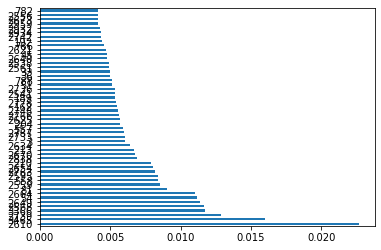

In [45]:
feat_importances = pd.Series(rf2.feature_importances_)
feat_importances.nlargest(50).plot(kind='barh')
print(feat_importances.nlargest(50))

In [47]:
X_res

array([[17.        ,  0.        , 17.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [43.44510045, 43.87477381, -0.42967336, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.25070034,  0.        ,  2.25070034, ...,  0.        ,
         0.        ,  0.        ],
       [88.5217512 , 89.17391707, -0.65216587, ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
train_df

,commit,committer_date,file,oldest_name,change_type,comm,adev,ddev,add,del,...,induces__ZEPPELIN-840__96dbc6656be6df5a19fd01af6b147327702e4392__2016-06-09 16:11:49,induces__ZEPPELIN-41__51391e5cc389e127aa0d7a78a03491296ede394f__2013-11-07 11:26:51,induces__ZEPPELIN-1121__ca78995fd15a34cf749626293ec966951d4d5f3a__2016-07-07 02:28:23,induces__ZEPPELIN-581__11d25be8c3d13f55763609a4ccb93394771a6971__2016-01-13 10:30:55,induces__ZEPPELIN-19__1b7a6a8418757c1ca61911a679406d911ee14c8c__2013-10-28 09:01:17,induces__ZEPPELIN-1725__752c8abba15dd8caee99b542bf09d702681a77fc__2016-11-30 04:57:41,induces__ZEPPELIN-1427__c717daf6556c708a771ac89efd36b26ef2988c71__2016-09-26 01:37:48,induces__ZEPPELIN-103__9c44ca32904f7d3cbf94afdc32183e1d04478b63__2014-02-19 01:31:18,project,is_inducing
0,c20fd6454e5733628ead3f129c7e803c1ead5b94,2013-08-15 20:57:35+09:00,zeppelin-core/src/main/java/org/nflabs/zeppeli...,zeppelin-core/src/main/java/org/nflabs/zeppeli...,ModificationType.ADD,1,1,1,0.129267,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
1,c20fd6454e5733628ead3f129c7e803c1ead5b94,2013-08-15 20:57:35+09:00,zeppelin-core/src/main/java/org/nflabs/zeppeli...,zeppelin-core/src/main/java/org/nflabs/zeppeli...,ModificationType.ADD,1,1,1,0.003631,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
2,c20fd6454e5733628ead3f129c7e803c1ead5b94,2013-08-15 20:57:35+09:00,zeppelin-core/src/main/java/org/nflabs/zeppeli...,zeppelin-core/src/main/java/org/nflabs/zeppeli...,ModificationType.ADD,1,1,1,0.012346,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
3,c20fd6454e5733628ead3f129c7e803c1ead5b94,2013-08-15 20:57:35+09:00,zeppelin-core/src/main/java/org/nflabs/zeppeli...,zeppelin-core/src/main/java/org/nflabs/zeppeli...,ModificationType.ADD,1,1,1,0.039216,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
4,c20fd6454e5733628ead3f129c7e803c1ead5b94,2013-08-15 20:57:35+09:00,zeppelin-core/src/main/java/org/nflabs/zeppeli...,zeppelin-core/src/main/java/org/nflabs/zeppeli...,ModificationType.ADD,1,1,1,0.017429,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,465c51a419347f89a7d73c8014b3b46f27f1d5b8,2016-10-15 12:26:50-07:00,pig/src/main/java/org/apache/zeppelin/pig/PigI...,pig/src/main/java/org/apache/zeppelin/pig/PigI...,ModificationType.ADD,1,1,1,0.091946,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
3120,465c51a419347f89a7d73c8014b3b46f27f1d5b8,2016-10-15 12:26:50-07:00,pig/src/main/java/org/apache/zeppelin/pig/PigQ...,pig/src/main/java/org/apache/zeppelin/pig/PigQ...,ModificationType.ADD,1,1,1,0.115436,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
3121,465c51a419347f89a7d73c8014b3b46f27f1d5b8,2016-10-15 12:26:50-07:00,pig/src/main/java/org/apache/zeppelin/pig/PigS...,pig/src/main/java/org/apache/zeppelin/pig/PigS...,ModificationType.ADD,1,1,1,0.063087,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False
3122,465c51a419347f89a7d73c8014b3b46f27f1d5b8,2016-10-15 12:26:50-07:00,pig/src/main/java/org/apache/zeppelin/pig/PigU...,pig/src/main/java/org/apache/zeppelin/pig/PigU...,ModificationType.ADD,1,1,1,0.195973,0.000000,...,0,0,0,0,0,0,0,0,zeppelin,False


In [50]:
X_train.shape[1]

3549

In [51]:
X_res.shape[1]

3549

In [52]:
len(feat_importances)

3549

In [56]:
train_df[ALL_FEATURES].shape[1]

3549

In [68]:
type(train_df['current_CLOC_method_min'])

pandas.core.series.Series

In [74]:
fif_bes = list(feat_importances.nlargest(50).index)

In [75]:
fif_bes

['current_CD_method_min',
 'current_PMD_ACGE',
 'current_NOS_method_median',
 'current_PMD_PL',
 'current_NLE_method_max',
 'current_DLOC_method_median',
 'current_NLE_class_median',
 'current_TCD_method_median',
 'current_CBO_class_avg',
 'current_NL_method_median',
 'current_NOS_class_max',
 'current_NOI_method_min',
 'current_TLLOC_method_max',
 'delta_DLOC_method_sum',
 'current_PDA_class_min',
 'current_HPV_method_max',
 'current_TCLOC_method_min',
 'current_PDA_class_max',
 'current_CLOC_method_median',
 'current_PDA_file',
 'current_NOS_method_max',
 'current_TNOS_method_sum',
 'delta_NOS_class_min',
 'current_DLOC_class_median',
 'current_CLOC_method_min',
 'current_TLLOC_method_avg',
 'current_TLOC_method_max',
 'current_AD_class_sum',
 'current_TNOS_method_max',
 'current_CLOC_class_median',
 'current_McCC_method_avg',
 'current_NOS_method_avg',
 'current_NLE_class_avg',
 'delta_TNOS_class_avg',
 'current_NL_class_avg',
 'current_NL_class_max',
 'delta_NL_method_median',
 'cu

In [82]:
with open('selected_features.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(fif_bes)

In [76]:
new_df = pd.concat([train_df[feat] for feat in fif_bes], axis=1)

In [77]:
new_df

,current_CD_method_min,current_PMD_ACGE,current_NOS_method_median,current_PMD_PL,current_NLE_method_max,current_DLOC_method_median,current_NLE_class_median,current_TCD_method_median,current_CBO_class_avg,current_NL_method_median,...,delta_CD_method_median,current_TNOS_class_avg,current_CLOC_class_sum,current_NOS_method_sum,nadev,minor,kamei_ndev,current_TCLOC_method_max,current_NL_method_avg,delta_TNOS_class_min
0,0.800000,0,0.0,0,0.0,6.0,0.0,0.857143,0.000000,0.0,...,0.857143,0.000000,0.0,0.0,818,0,1,12.0,0.000000,0.0
1,0.000000,0,1.0,0,1.0,3.0,1.0,0.500000,2.000000,0.0,...,0.500000,22.000000,57.0,22.0,818,0,1,7.0,0.400000,22.0
2,0.000000,0,0.0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,5.0,0.0,818,0,1,0.0,0.000000,0.0
3,0.857143,0,0.0,0,0.0,7.0,0.0,0.873016,0.000000,0.0,...,0.873016,0.000000,0.0,0.0,818,0,1,8.0,0.000000,0.0
4,0.800000,0,0.0,0,0.0,5.0,0.0,0.833333,0.000000,0.0,...,0.833333,0.000000,0.0,0.0,818,0,1,5.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28566,0.000000,0,1.0,0,1.0,0.0,1.0,0.000000,4.333333,0.0,...,0.000000,19.666667,29.0,49.0,0,2,4,9.0,0.428571,0.0
28567,0.000000,0,1.0,0,3.0,0.0,2.0,0.000000,3.000000,0.0,...,0.000000,35.666667,10.0,77.0,0,6,9,3.0,0.346154,0.0
28568,0.000000,0,3.0,0,4.0,0.0,4.0,0.000000,9.000000,0.0,...,0.000000,74.000000,23.0,74.0,0,3,7,11.0,0.857143,-28.0
28569,0.000000,1,4.5,0,4.0,9.5,4.0,0.500000,8.000000,1.0,...,0.000000,250.000000,381.0,250.0,11,5,13,26.0,1.285714,-1.0


In [78]:
new_df.shape

(28571, 50)

In [79]:
train_df.shape

(28571, 5553)

In [83]:
new = []
with open('selected_features.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        new.append(row)

In [84]:
new

[['current_CD_method_min,current_PMD_ACGE,current_NOS_method_median,current_PMD_PL,current_NLE_method_max,current_DLOC_method_median,current_NLE_class_median,current_TCD_method_median,current_CBO_class_avg,current_NL_method_median,current_NOS_class_max,current_NOI_method_min,current_TLLOC_method_max,delta_DLOC_method_sum,current_PDA_class_min,current_HPV_method_max,current_TCLOC_method_min,current_PDA_class_max,current_CLOC_method_median,current_PDA_file,current_NOS_method_max,current_TNOS_method_sum,delta_NOS_class_min,current_DLOC_class_median,current_CLOC_method_min,current_TLLOC_method_avg,current_TLOC_method_max,current_AD_class_sum,current_TNOS_method_max,current_CLOC_class_median,current_McCC_method_avg,current_NOS_method_avg,current_NLE_class_avg,delta_TNOS_class_avg,current_NL_class_avg,current_NL_class_max,delta_NL_method_median,current_McCC_method_max,current_DLOC_method_min,current_NLE_class_min,delta_CD_method_median,current_TNOS_class_avg,current_CLOC_class_sum,current_NO